### Import libraries

In [1]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster
import sklearn.metrics
import pandas as pd
import csv
from matplotlib.pyplot import specgram
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf
%matplotlib inline

Using TensorFlow backend.


### Show waveforms of some sample sounds

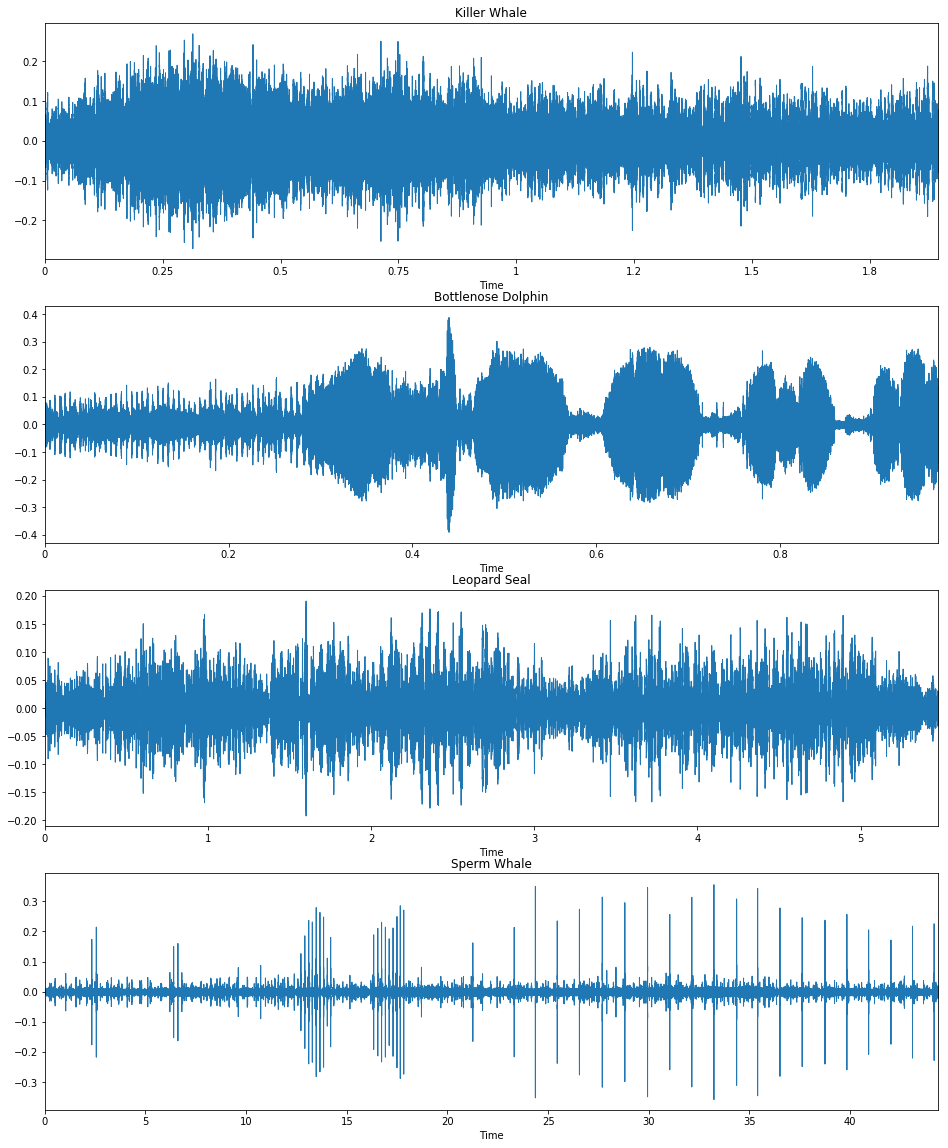

In [2]:
waveplot = plt.figure(figsize=(16, 20))

data, sampling_rate = librosa.load('Training Data/sounds/Killer Whale (1).wav')
plt.subplot(4, 1, 1)
librosa.display.waveplot(data, sr=sampling_rate)
plt.title('Killer Whale')

data, sampling_rate = librosa.load('Training Data/sounds/Bottlenose Dolphin (1).wav')
plt.subplot(4, 1, 2)
librosa.display.waveplot(data, sr=sampling_rate)
plt.title('Bottlenose Dolphin')

data, sampling_rate = librosa.load('Training Data/sounds/Leopard Seal (1).wav')
plt.subplot(4, 1, 3)
librosa.display.waveplot(data, sr=sampling_rate)
plt.title('Leopard Seal')

data, sampling_rate = librosa.load('Training Data/sounds/Sperm Whale (1).wav')
plt.subplot(4, 1, 4)
librosa.display.waveplot(data, sr=sampling_rate)
plt.title('Sperm Whale')

waveplot.savefig('waveplot.png')

### Show linear-scaled power spectrograms of some sample sounds

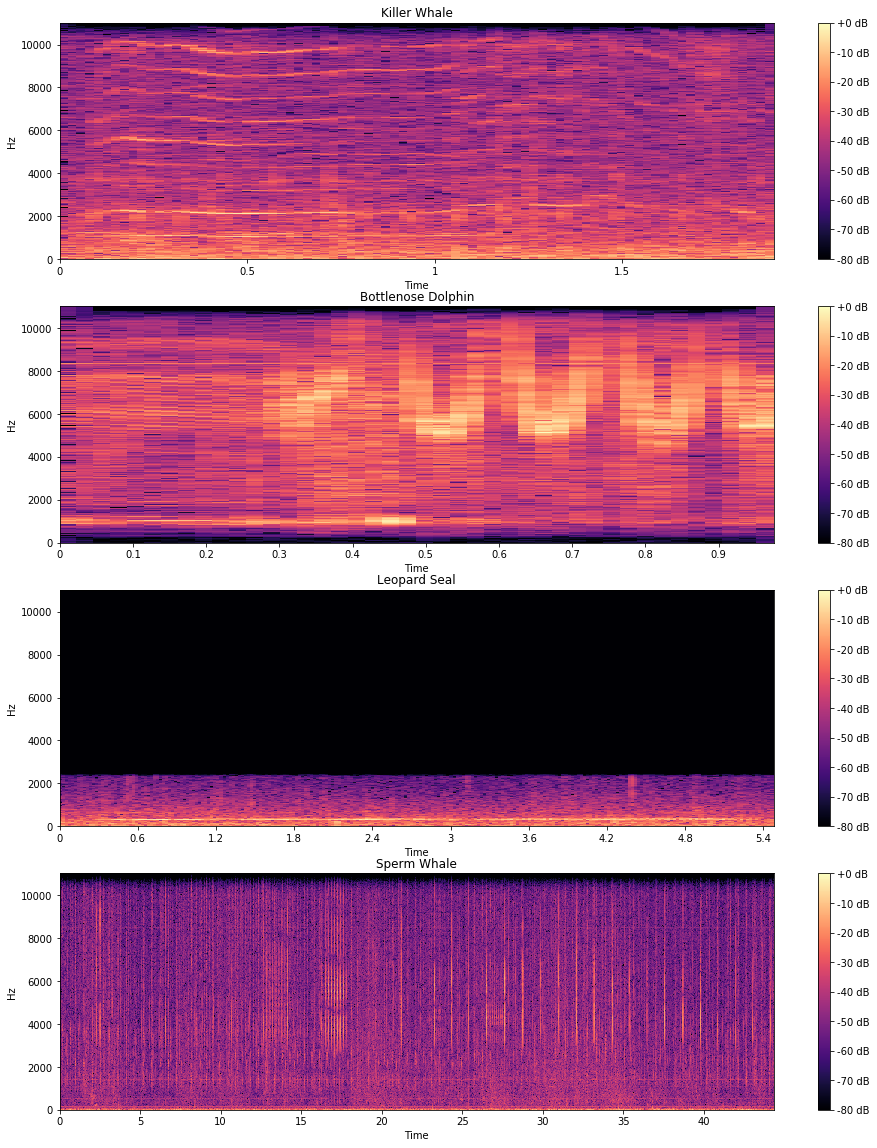

In [3]:
linearspecgram = plt.figure(figsize=(16, 20))

data, sampling_rate = librosa.load('Training Data/sounds/Killer Whale (1).wav')
plt.subplot(4, 1, 1)
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, x_axis='time' ,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Killer Whale')

data, sampling_rate = librosa.load('Training Data/sounds/Bottlenose Dolphin (1).wav')
plt.subplot(4, 1, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, x_axis='time' ,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Bottlenose Dolphin')

data, sampling_rate = librosa.load('Training Data/sounds/Leopard Seal (1).wav')
plt.subplot(4, 1, 3)
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, x_axis='time' ,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Leopard Seal')

data, sampling_rate = librosa.load('Training Data/sounds/Sperm Whale (1).wav')
plt.subplot(4, 1, 4)
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, x_axis='time' ,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Sperm Whale')

linearspecgram.savefig('spectrogram.png')

### Show log-scaled power spectrograms of some sample sounds

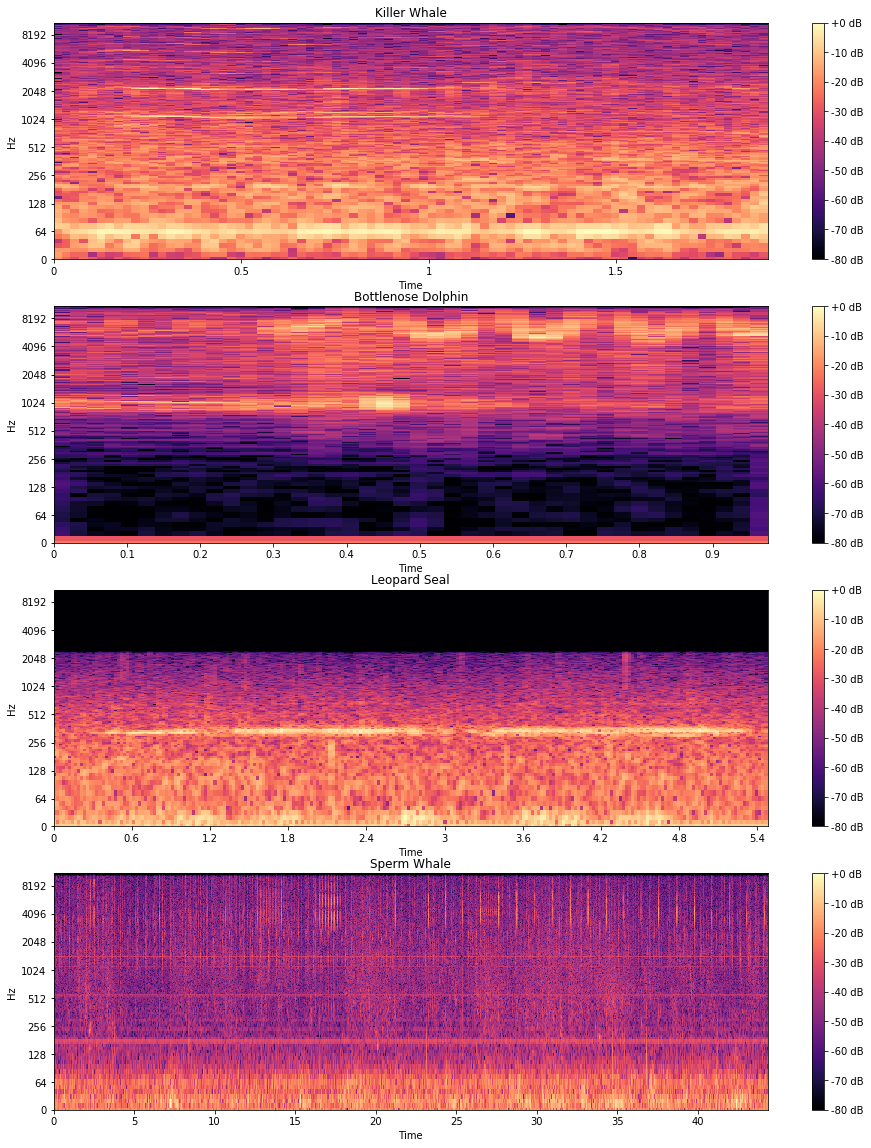

In [4]:
logspecgram = plt.figure(figsize=(16, 20))

data, sampling_rate = librosa.load('Training Data/sounds/Killer Whale (1).wav')
plt.subplot(4, 1, 1)
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, x_axis='time' ,y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Killer Whale')

data, sampling_rate = librosa.load('Training Data/sounds/Bottlenose Dolphin (1).wav')
plt.subplot(4, 1, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, x_axis='time' ,y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Bottlenose Dolphin')

data, sampling_rate = librosa.load('Training Data/sounds/Leopard Seal (1).wav')
plt.subplot(4, 1, 3)
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, x_axis='time' ,y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Leopard Seal')

data, sampling_rate = librosa.load('Training Data/sounds/Sperm Whale (1).wav')
plt.subplot(4, 1, 4)
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, x_axis='time' ,y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Sperm Whale')

logspecgram.savefig('logspectrogram.png')

### Show chromagrams of some sample sounds

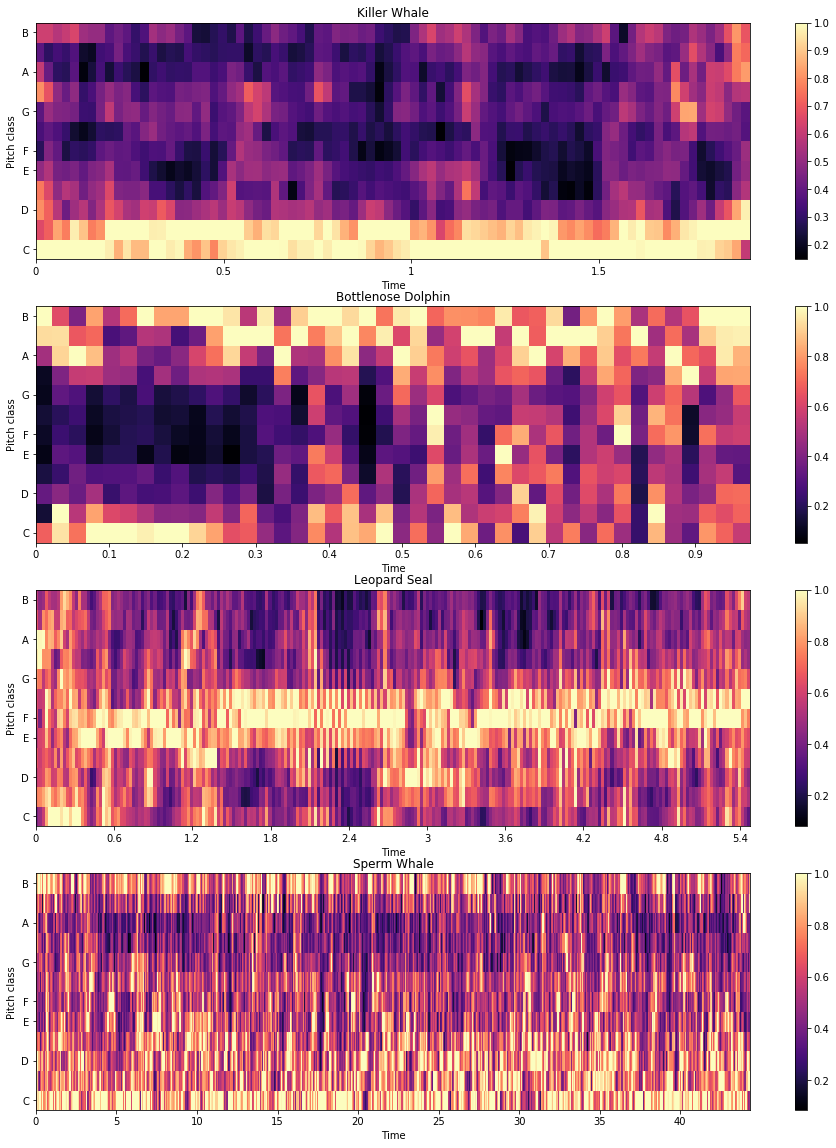

In [5]:
chroma = plt.figure(figsize=(16, 20))

data, sampling_rate = librosa.load('Training Data/sounds/Killer Whale (1).wav')
plt.subplot(4, 1, 1)
C = librosa.feature.chroma_cqt(y=data, sr=sampling_rate)
librosa.display.specshow(C, x_axis='time' ,y_axis='chroma')
plt.colorbar()
plt.title('Killer Whale')

data, sampling_rate = librosa.load('Training Data/sounds/Bottlenose Dolphin (1).wav')
plt.subplot(4, 1, 2)
C = librosa.feature.chroma_cqt(y=data, sr=sampling_rate)
librosa.display.specshow(C, x_axis='time' ,y_axis='chroma')
plt.colorbar()
plt.title('Bottlenose Dolphin')

data, sampling_rate = librosa.load('Training Data/sounds/Leopard Seal (1).wav')
plt.subplot(4, 1, 3)
C = librosa.feature.chroma_cqt(y=data, sr=sampling_rate)
librosa.display.specshow(C, x_axis='time' ,y_axis='chroma')
plt.colorbar()
plt.title('Leopard Seal')

data, sampling_rate = librosa.load('Training Data/sounds/Sperm Whale (1).wav')
plt.subplot(4, 1, 4)
C = librosa.feature.chroma_cqt(y=data, sr=sampling_rate)
librosa.display.specshow(C, x_axis='time' ,y_axis='chroma')
plt.colorbar()
plt.title('Sperm Whale')

chroma.savefig('chromagram.png')

### Extract features (MFCC)

#### Note: comment out features not being extracted when running code below

In [6]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    features = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0) #mel-scaled spectrogram
#    features = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) #mfcc
#    features = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0) #chromagram
#    features = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0) #spectral contrasts
    return features

In [7]:
for filename in os.listdir('Training Data/sounds'):
    mel = extract_feature('Training Data/sounds/' + filename)
    np.savetxt('Training Data/mel/' + filename + '.csv', [mel], delimiter=',') #save mel-scaled spectrograms into csv files
#    mfccs = extract_feature('Training Data/sounds/' + filename)
#    np.savetxt('Training Data/mfcc/' + filename + '.csv', [mfccs], delimiter=',') #save mfccs into csv files
#    chroma = extract_feature('Training Data/sounds/' + filename)
#    np.savetxt('Training Data/chroma/' + filename + '.csv', [chroma], delimiter=',') #save chromagrams into csv files
#    contrast = extract_feature('Training Data/sounds/' + filename)
#    np.savetxt('Training Data/contrast/' + filename + '.csv', [contrast], delimiter=',') #save spectral contrasts into csv files

### Combine the csv files (Using cmd)

1. Open Command Prompt.
2. Go to the folder containing the csv files.
    ```bash
	cd ~/.../Training Data/mel
	```
3. Compile all the csv files in the folder into one csv file.
    ```bash
	copy *.csv mel.csv
	```
Note: Change "mel" to "mfcc" or "chroma" or "contrast" when using the respective feature set

### Train data

In [12]:
raw_data=pd.read_csv('Training Data/mel/mel.csv')
#raw_data=pd.read_csv('Training Data/mel/mfcc.csv')
#raw_data=pd.read_csv('Training Data/mel/chroma.csv')
#raw_data=pd.read_csv('Training Data/mel/contrast.csv')
train_data=raw_data.drop('audio', 1)
print(train_data)

      Unnamed: 1  Unnamed: 2  Unnamed: 3    Unnamed: 4    Unnamed: 5  \
0       10.40000    4.110000    0.462000  3.300000e-01  8.530000e-02   
1        0.00770    0.000004    0.000002  1.070000e-06  1.120000e-06   
2        0.00746    0.000002    0.000001  9.450000e-07  8.510000e-07   
3        0.00742    0.000003    0.000002  1.400000e-06  1.170000e-06   
4        0.00757    0.000003    0.000002  1.290000e-06  1.020000e-06   
5        0.00772    0.000003    0.000002  1.380000e-06  1.260000e-06   
6        0.00777    0.000003    0.000002  1.260000e-06  1.060000e-06   
7        0.00791    0.000003    0.000001  1.190000e-06  1.090000e-06   
8        0.01660    0.000017    0.000013  4.520000e-06  4.100000e-06   
9        2.43000    2.430000    1.130000  8.950000e-01  1.020000e+00   
10       3.20000    2.400000    1.060000  9.330000e-01  1.090000e+00   
11       0.00738    0.000003    0.000002  1.220000e-06  1.180000e-06   
12      99.40000   12.800000    1.900000  1.420000e+00  1.420000

In [13]:
train_data=pd.DataFrame(sklearn.preprocessing.scale(train_data))

#### K-Means Clustering

In [14]:
kmeans = sklearn.cluster.KMeans(n_clusters=32, max_iter=300, random_state=0)
kmeans.fit(train_data)
y_pred = kmeans.fit_predict(train_data)

#### Finding the silhouette score

In [15]:
labels = kmeans.labels_
sklearn.metrics.silhouette_score(train_data, labels, metric='euclidean')

0.6581021712190699

#### Visualisation using t-SNE

In [16]:
pca = PCA(n_components=50)
X = pca.fit_transform(train_data)
X.shape

(1697, 50)

In [17]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(1697, 2)

No handles with labels found to put in legend.


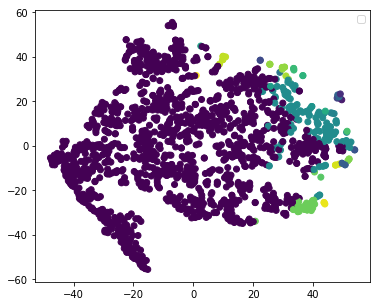

In [18]:
# Plot t-SNE
xs = X_embedded[:,0]
ys = X_embedded[:,1]

fig = plt.figure(figsize=(6, 5))
plt.scatter(xs, ys, c=y_pred)
plt.legend()
plt.show()

fig.savefig('mel_tsne.png') # save graph
#fig.savefig('mfcc_tsne.png') # save graph
#fig.savefig('chroma_tsne.png') # save graph
#fig.savefig('ontrast_tsne.png') # save graph

### Applying dimensionality reduction

#### Autoencoder

In [19]:
from keras.layers import Input, Dense
from keras.models import Model

input_img = Input(shape=(128,))
encoded = Dense(64, activation='relu')(input_img)

decoded = Dense(128, activation='relu')(encoded)

autoencoder = Model(input_img, decoded)

In [20]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [21]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
raw_data=pd.read_csv('Training Data/mel/mel.csv')
train_data=raw_data.drop('audio', 1)

x_train=pd.DataFrame(sklearn.preprocessing.scale(train_data))

print (x_train.shape)

(1697, 128)


In [24]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=None)

Epoch 1/50
1697/1697 [==============================] - 6s 4ms/step - loss: 0.7315
Epoch 2/50
1697/1697 [==============================] - 0s 144us/step - loss: 0.5786
Epoch 3/50
1697/1697 [==============================] - 0s 144us/step - loss: 0.5301
Epoch 4/50
1697/1697 [==============================] - 0s 144us/step - loss: 0.4916
Epoch 5/50
1697/1697 [==============================] - 0s 151us/step - loss: 0.4508
Epoch 6/50
1697/1697 [==============================] - 0s 151us/step - loss: 0.4367
Epoch 7/50
1697/1697 [==============================] - 0s 140us/step - loss: 0.3813
Epoch 8/50
1697/1697 [==============================] - 0s 144us/step - loss: 0.3626
Epoch 9/50
1697/1697 [==============================] - 0s 151us/step - loss: 0.3471
Epoch 10/50
1697/1697 [==============================] - 0s 142us/step - loss: 0.3380
Epoch 11/50
1697/1697 [==============================] - 0s 154us/step - loss: 0.3366
Epoch 12/50
1697/1697 [==============================] - 0s 136us

In [25]:
from keras.models import load_model

autoencoder.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del autoencoder  # deletes the existing model

In [26]:
autoencoder = load_model('my_model.h5')

In [27]:
test = encoder.predict(x_train)

In [28]:
test.shape

(1697, 64)

In [29]:
kmeans = sklearn.cluster.KMeans(n_clusters=32, max_iter=300, random_state=0)
kmeans.fit(test)
y_pred = kmeans.fit_predict(test)

In [30]:
labels = kmeans.labels_
sklearn.metrics.silhouette_score(test, labels, metric='euclidean')

0.5108285

In [31]:
pca = PCA(n_components=50)
X = pca.fit_transform(test)
X.shape

(1697, 50)

In [32]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(1697, 2)

No handles with labels found to put in legend.


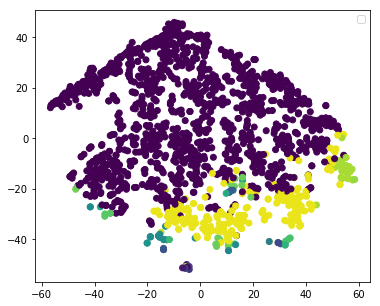

In [33]:
# Plot t-SNE
xs = X_embedded[:,0]
ys = X_embedded[:,1]

fig = plt.figure(figsize=(6, 5))
plt.scatter(xs, ys, c=y_pred)
plt.legend()
plt.show()

fig.savefig('mel_tsne_encoder.png')